In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

2024-10-29 09:44:29.563607: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730175269.635735     979 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730175269.656261     979 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 09:44:29.830006: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Training image processing

trainingSet = tf.keras.utils.image_dataset_from_directory(
    "train",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
)

Found 70295 files belonging to 38 classes.


I0000 00:00:1730175284.490388     979 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
#Validation image processing

validationSet = tf.keras.utils.image_dataset_from_directory(
    "valid",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (128, 128),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False,
    pad_to_aspect_ratio = False,
)

Found 17572 files belonging to 38 classes.


In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [5]:
#Building Model

model = Sequential()

In [6]:
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

/home/srayan/Programs/Leaf-Disease-Detection/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [8]:
model.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units=1500, activation="relu"))

In [14]:
model.add(Dropout(0.4))

In [15]:
#Output Layer
model.add(Dense(units=38, activation="softmax"))

In [16]:
#Compiling Model

model.compile(tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#Training Model

trainingHistory = model.fit(x=trainingSet, validation_data=validationSet, epochs=10)

Epoch 1/10
2196/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5995 - loss: 1.3357

2024-10-29 10:04:30.534566: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2141', 96 bytes spill stores, 96 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 149s 67ms/step - accuracy: 0.5996 - loss: 1.3354 - val_accuracy: 0.8616 - val_loss: 0.4495
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.8511 - loss: 0.4721 - val_accuracy: 0.8733 - val_loss: 0.4089
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9088 - loss: 0.2865 - val_accuracy: 0.9353 - val_loss: 0.2084
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 64ms/step - accuracy: 0.9348 - loss: 0.2014 - val_accuracy: 0.9380 - val_loss: 0.1968
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9525 - loss: 0.1461 - val_accuracy: 0.9394 - val_loss: 0.1963
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9643 - loss: 0.1122 - val_accuracy: 0.9561 - val_loss: 0.1333
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9693 - loss: 0.0933 - val_accuracy: 0.9604 - val_loss: 0.1233
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9742 - lo

In [24]:
#Model Evalutaion

trainLoss, trainAccuracy = model.evaluate(trainingSet)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.9920 - loss: 0.0248


In [25]:
print(trainLoss, trainAccuracy)

0.021491557359695435 0.993228554725647


In [26]:
trainLoss, trainAccuracy = model.evaluate(validationSet)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9688 - loss: 0.0952


In [27]:
print(trainLoss, trainAccuracy)

0.09952039271593094 0.9680742025375366


In [29]:
model.save("trainedModel.keras")

In [30]:
trainingHistory.history

{'accuracy': [0.6989970803260803,
  0.8700191974639893,
  0.9176470637321472,
  0.9410768747329712,
  0.9551888704299927,
  0.9651610851287842,
  0.9713777899742126,
  0.9756597280502319,
  0.9778647422790527,
  0.9819190502166748],
 'loss': [0.9851926565170288,
  0.40893563628196716,
  0.25579220056533813,
  0.1800793558359146,
  0.1363772600889206,
  0.10809467732906342,
  0.08754945546388626,
  0.07504677772521973,
  0.06748654693365097,
  0.05749274045228958],
 'val_accuracy': [0.861598014831543,
  0.8732643127441406,
  0.9352948069572449,
  0.9380264282226562,
  0.9394491314888,
  0.9560664892196655,
  0.9603915214538574,
  0.9578306674957275,
  0.963464617729187,
  0.9680742025375366],
 'val_loss': [0.44952115416526794,
  0.4088689684867859,
  0.2083902806043625,
  0.19682997465133667,
  0.19630217552185059,
  0.13326209783554077,
  0.12331081181764603,
  0.14604440331459045,
  0.12361884117126465,
  0.09952030330896378]}

In [32]:
#Recording History

import json

with open("trainingHistory.json", "w") as file:
    json.dump(trainingHistory.history, file)

<function matplotlib.pyplot.show(close=None, block=None)>

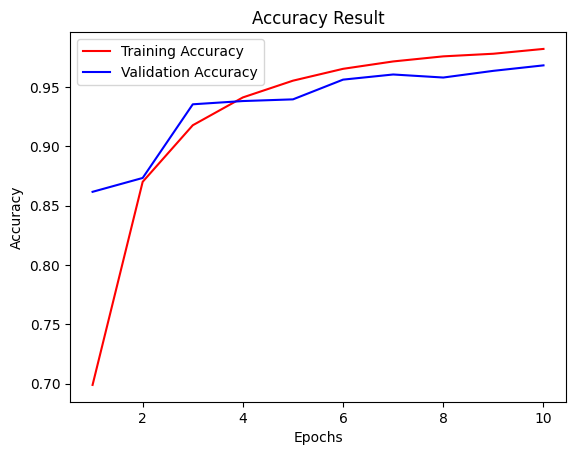

In [37]:
#Accuracy Visualization

epochs = [i for i in range(1, 11)]
plt.plot(epochs, trainingHistory.history["accuracy"], color="red", label="Training Accuracy")
plt.plot(epochs, trainingHistory.history["val_accuracy"], color="blue", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Result")
plt.legend()
plt.show